## Classification - LAB

We will apply our general Statistical Theory Framework in the case when the output variable `Y` is categorical. In this notebok we will consider 

* Logistic Regression
* Linear Discriminant Analysis (LDA)
* Quadratic Discriminant Analysis (QDA)
* K-nearest neighbor (KNN)

### Load the market data

In [1]:
# Load packages we will need
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [3]:
# Get the data
import os

UP_DIR = '/Users/iordan/Documents/Statistics/Hunter/Statistical Learning_STAT724/2020/data/'
csv_file = os.path.join(UP_DIR,'Smarket.csv')

smarket = pd.read_csv(csv_file, header=0, index_col=0, squeeze=True)

In [4]:
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


Create a 0-1 output

In [5]:
#smarket['Direction2'] = smarket.factorize()[0]
smarket['Direction2'] = smarket.Direction.map({'Up':1,'Down':0})

Now, split into train (before year 2005) and test portions

In [6]:
#from sklearn.model_selection import train_test_split
#df_train, df_test = train_test_split(smarket, random_state=1)
smarket_train = smarket[smarket['Year']<2005]
smarket_test = smarket[smarket['Year']>=2005]

In [7]:
print('train size: {0}  test size {1}'.format(smarket_train.shape[0],smarket_test.shape[0]))
#df_test.describe

train size: 998  test size 252


#### 4.6.1 The Stock Market Data

The Smarket data, which is part of the ISLR library, consists of percentage returns for the S&P 500 stock index over 1,250 days, from the beginning of 2001 until the end of 2005. 

For each date, we have recorded the percentage returns for each of the five previous trading days, Lag1 through Lag5. We have also recorded **Volume** (the number of shares traded on the previous day, in billions), **Today** (the percentage return on the date in question) and **Direction** (whether the market was Up or Down on this date).

### Logistic Regression

Select only Lag1 and Lag2 as predictors

In [8]:
X_train = smarket_train[['Lag1','Lag2']]
y_train = smarket_train['Direction2']
X_test = smarket_test[['Lag1','Lag2']]
y_test = smarket_test['Direction2']

Fit the model on the train data

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y_train)
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[-0.05547007 -0.04436492]]
intercept : [0.0322169]


#### Test the accuracy of the model on the test data - *look at the "refresher" on metrics at the end*

In [10]:
pred = clf.predict(X_test)

# Find the accuracy of the predictions against the true classes
print("accuracy: %0.3f" % accuracy_score(y_test, pred))

# Show the confusion matrix
#print(confusion_matrix(y_test, pred))
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, pred))

accuracy: 0.560

Confusion table:
 True        0    1
Predicted         
0          35   35
1          76  106

               precision    recall  f1-score   support

           0       0.50      0.32      0.39       111
           1       0.58      0.75      0.66       141

    accuracy                           0.56       252
   macro avg       0.54      0.53      0.52       252
weighted avg       0.55      0.56      0.54       252



### Linear Disciminant Analysis (LDA)

Use the same two predictors (Lag1 and Lag2) to forecast up/down market movement but fit an LDA model

In [11]:
lda = LinearDiscriminantAnalysis()
pred = lda.fit(X_train, y_train).predict(X_test)

print(lda.means_)

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [12]:
# Find the accuracy of the predictions against the true classes
print("accuracy: %0.3f" % accuracy_score(y_test, pred))

# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, pred))

accuracy: 0.560

Confusion table:
 True        0    1
Predicted         
0          35   35
1          76  106

               precision    recall  f1-score   support

           0       0.50      0.32      0.39       111
           1       0.58      0.75      0.66       141

    accuracy                           0.56       252
   macro avg       0.54      0.53      0.52       252
weighted avg       0.55      0.56      0.54       252



The results are the same to the Logistic Regression model.

### Quadratic Disciminant Analysis (QDA)

Use the same two predictors (Lag1 and Lag2) to forecast up/down market movement but fit an LDA model

In [13]:
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)

print(qda.means_)

# Find the accuracy of the predictions against the true classes
print("accuracy: %0.3f" % accuracy_score(y_test, pred))

# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, pred))

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
accuracy: 0.599

Confusion table:
 True        0    1
Predicted         
0          30   20
1          81  121

               precision    recall  f1-score   support

           0       0.60      0.27      0.37       111
           1       0.60      0.86      0.71       141

    accuracy                           0.60       252
   macro avg       0.60      0.56      0.54       252
weighted avg       0.60      0.60      0.56       252



### KNN

In the classification case, KNN takes the "majority (plurality) vote" approach. In the 2-class problem we are considering class for a fixed (new) observation $x_0$ is assigned as the class of the *majority* of the $K$ closest to $x_0$ observations. 

Amother way to express the predicted class $\hat{~f}(x_0)$ is 

$$\hat{f~}(x_0)= \frac{1}{K} \sum_{i: x_i\in N_k(x_0)} I(y_i)$$

In [15]:
# For K=1 the method is equivalent to a random choice
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train, y_train).predict(X_test)
#print(confusion_matrix(y_test, pred).T)
#print(classification_report(y_test, pred, digits=3))
# Find the accuracy of the predictions against the true classes
print("accuracy: %0.3f" % accuracy_score(y_test, pred))

# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, pred))

accuracy: 0.500

Confusion table:
 True        0   1
Predicted        
0          43  58
1          68  83

               precision    recall  f1-score   support

           0       0.43      0.39      0.41       111
           1       0.55      0.59      0.57       141

    accuracy                           0.50       252
   macro avg       0.49      0.49      0.49       252
weighted avg       0.50      0.50      0.50       252



In [16]:
# K=3 is a better choice
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
pred = knn.fit(X_train, y_train).predict(X_test)

# Find the accuracy of the predictions against the true classes
print("accuracy: %0.3f" % accuracy_score(y_test, pred))
# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, pred))

accuracy: 0.532

Confusion table:
 True        0   1
Predicted        
0          48  55
1          63  86

               precision    recall  f1-score   support

           0       0.47      0.43      0.45       111
           1       0.58      0.61      0.59       141

    accuracy                           0.53       252
   macro avg       0.52      0.52      0.52       252
weighted avg       0.53      0.53      0.53       252



### The plots below illustrate this algorithm for K=1, 3.

In [17]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

datasets = [smarket]

h = .02  # step size in the mesh
names = ["1-Nearest Neighbors", "3-Nearest Neighbors"]
classifiers = [KNeighborsClassifier(1), KNeighborsClassifier(3)]

figure = plt.figure(figsize=(27, 9))
i = 1
ds_cnt = 0

# preprocess dataset, split into training and test part
X = smarket[['Lag1','Lag2']].values
y = smarket['Direction2'].values

smarket_train = smarket[smarket['Year']<2005]
smarket_test = smarket[smarket['Year']>=2005]

X_train = smarket_train[['Lag1','Lag2']].values
y_train = smarket_train['Direction2'].values
X_test = smarket_test[['Lag1','Lag2']].values
y_test = smarket_test['Direction2'].values

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

<Figure size 1944x648 with 0 Axes>

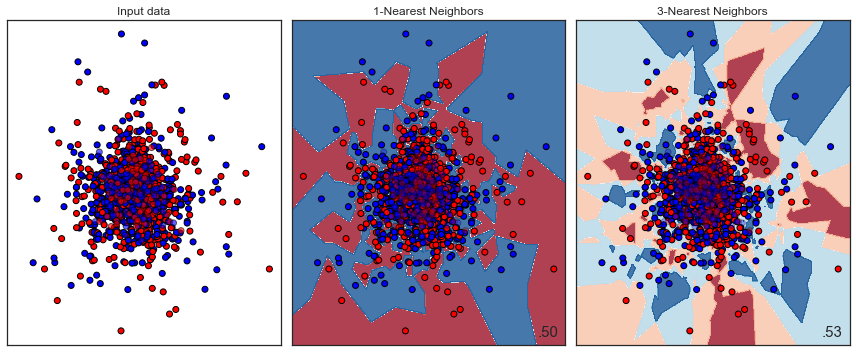

In [18]:
fig = plt.figure(figsize=(12,5))

# Plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
if ds_cnt == 0:
    ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,edgecolors='k', alpha=0.3)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

In [ ]:
# Extra link: https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib

<hr/>

## Refresher on Metrics (Measures of Fit)

After you have trained a model, the big question is "how good" is the model.  There is a lot of nuance to answering that question, and correspondingly a large number of measures and techniques.

One common technique to look at a combination of successes and failure in a machine learning model is a *confusion matrix*.  Let us look at an example, picking up the whimsical data used above.  Suppose we wanted to guess the taxonomic class of an observed organism and our model had these results:

| Predict/Actual | Human    | Octopus  | Penguin  |
|----------------|----------|----------|----------|
| Human          |  **5**   |    0     |    2     |
| Octopus        |    3     |  **3**   |    3     |
| Penguin        |    0     |    1     |  **11**  |

Giving a single number to describe *how good* the model is is not immediately obvious.  The model is very good at predicting penguins, but it gets rather bad when it predicts octopi.  In fact, if the model predicts something is an octopus, it probably isn't (only 1/3rd of such predictions are accurate).

### Accuracy versus Precision versus Recall

Naïvely, we might simply ask about the *accuracy* of a model (at least for classification tasks).  
This is simply the number of *right* answers divided by the number of data points.  

In our example, we have 28 observations of organisms, and 19 were classified accurately, so that is a **68%** accuracy.  Again though, the accuracy varies quite a lot if we restrict it to just one class of the predictions.  For our multi-class labels, this may not be a bad measure.  

Consider a binary problem though:

| Predict/Actual | Positive | Negative |
|----------------|----------|----------|
| Positive       |    1     |    0     |
| Negative       |    2     |   997    | 

Calculating *accuracy*, we find that this model is **99.8%** accurate! That seems pretty good until you think of this test as a medical screening for a fatal disease.  *Two thirds of the people who actually have the disease will be judged free of it by this model* (and hence perhaps not be treated for the condition); that isn't such a happy real-world result.

<hr/>

In contrast with accuracy, the "precision" of a model is defined as:

$$\text{Precision} = \frac{true\: positive}{true\: positive + false\: positive}$$

Generalizing that to the multi-class case, the formula is as follows (here $M_{ij}$ is the count at cell $(i,j)$ and $i$ is the index of the targeted class):

$$\text{Precision}_{i} = \cfrac{M_{ii}}{\sum_i M_{ij}}$$

Applying that to our hypothetical medical screening, we get a a precision of **1.0**.  We cannot do better than that.  The problem is with "recall" which is defined as:

$$\text{Recall} = \frac{true\: positive}{true\: positive + false\: negative}$$

Generalizing that to the multi-class case:

$$\text{Recall}_{i} = \cfrac{M_{ii}}{\sum_j M_{ij}}$$

Here we do much worse by having a recall of **33.3%** in our medical diagnosis case! This is obviously a terrible result if we care about recall.

### F1 Score

There are several different algorithms that attempt to *blend* precision and recall to product a single "score."  Scikit-learn provides a number of other scalar scores that are useful for differing purposes (and other libraries are similar), but F1 score is one that is used very frequently.  It is simply:

$$\text{F1} = 2 \times \cfrac{precision \times recall}{precision + recall}$$

Applying that to our medical diagnostic model, we get an F1 score of 50%.  Still not good, but we account for the high precision to some extent.  For intermediate cases, the F1 score provides good balance.

F1 score can be generalized to multi-class models by averaging the F1 score across each class, counting only correct/incorrect per class.

### Code Example

In [155]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_true = ["human",   "octopus", "human", "human", "octopus", "penguin", "penguin"]
y_pred = ["octopus", "octopus", "human", "human", "octopus", "human",   "penguin"]

labels = ['octopus', 'penguin', 'human']
cm = confusion_matrix(y_true, y_pred, labels=labels)
print("Confusion Matrix (predict/actual):\n", 
      pd.DataFrame(cm, index=labels, columns=labels), sep="")

recall = np.diag(cm) / np.sum(cm, axis=1)
print("\nRecall:\n", pd.Series(recall, index=labels), sep="")

precision = np.diag(cm) / np.sum(cm, axis=0)
print("\nPrecision:\n", pd.Series(precision, index=labels), sep="")

print("\nAccuracy:\n", np.sum(np.diag(cm)) / np.sum(cm))

Confusion Matrix (predict/actual):
         octopus  penguin  human
octopus        2        0      0
penguin        0        1      1
human          1        0      2

Recall:
octopus    1.000000
penguin    0.500000
human      0.666667
dtype: float64

Precision:
octopus    0.666667
penguin    1.000000
human      0.666667
dtype: float64

Accuracy:
 0.7142857142857143


In this particular case, F1 score is very close to accuracy.  In fact, using the "micro" averaging method brings the result close to accuracy.  Using the "macro" averaging makes it equivalent to a NumPy reduction from the formula given.

In [156]:
from sklearn.metrics import f1_score
weighted_f1 = f1_score(y_true, y_pred, average="weighted")
print("\nF1 score:\n", weighted_f1, sep="")

print("Naive averaging F1 score:", np.mean(2*(recall*precision)/(recall+precision)))
print(" sklearn macro averaging:", f1_score(y_true, y_pred, average="macro"))


F1 score:
0.7047619047619048
Naive averaging F1 score: 0.7111111111111111
 sklearn macro averaging: 0.7111111111111111
